In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading of Data

In [2]:
location=r'D:\Velocity Corporate Training\Python\Databases\Finance Project\loan.csv'
df=pd.read_csv(location)
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
loan_amnt                163987 non-null int64
term                     163987 non-null object
int_rate                 163987 non-null float64
emp_length               158183 non-null float64
home_ownership           163987 non-null object
annual_inc               163983 non-null float64
purpose                  163987 non-null object
addr_state               163987 non-null object
dti                      163987 non-null float64
delinq_2yrs              163958 non-null float64
revol_util               163794 non-null float64
total_acc                163958 non-null float64
bad_loan                 163987 non-null int64
longest_credit_length    163958 non-null float64
verification_status      163987 non-null object
dtypes: float64(8), int64(2), object(5)
memory usage: 18.8+ MB


In [4]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [5]:
#Remove 'month' from term

df['term']=df['term'].replace({'36 months':36,'60 months':60})

In [6]:
# Finding Categorical Columns
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['home_ownership', 'purpose', 'addr_state', 'verification_status']


In [7]:
# Finding Numerical Columns
numerical_feature_mask = df.dtypes!=object

# filter categorical columns using mask and turn it into a list
numerical_cols = df.columns[numerical_feature_mask].tolist()
print(numerical_cols)

['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length']


# Exploratory Data Analysis

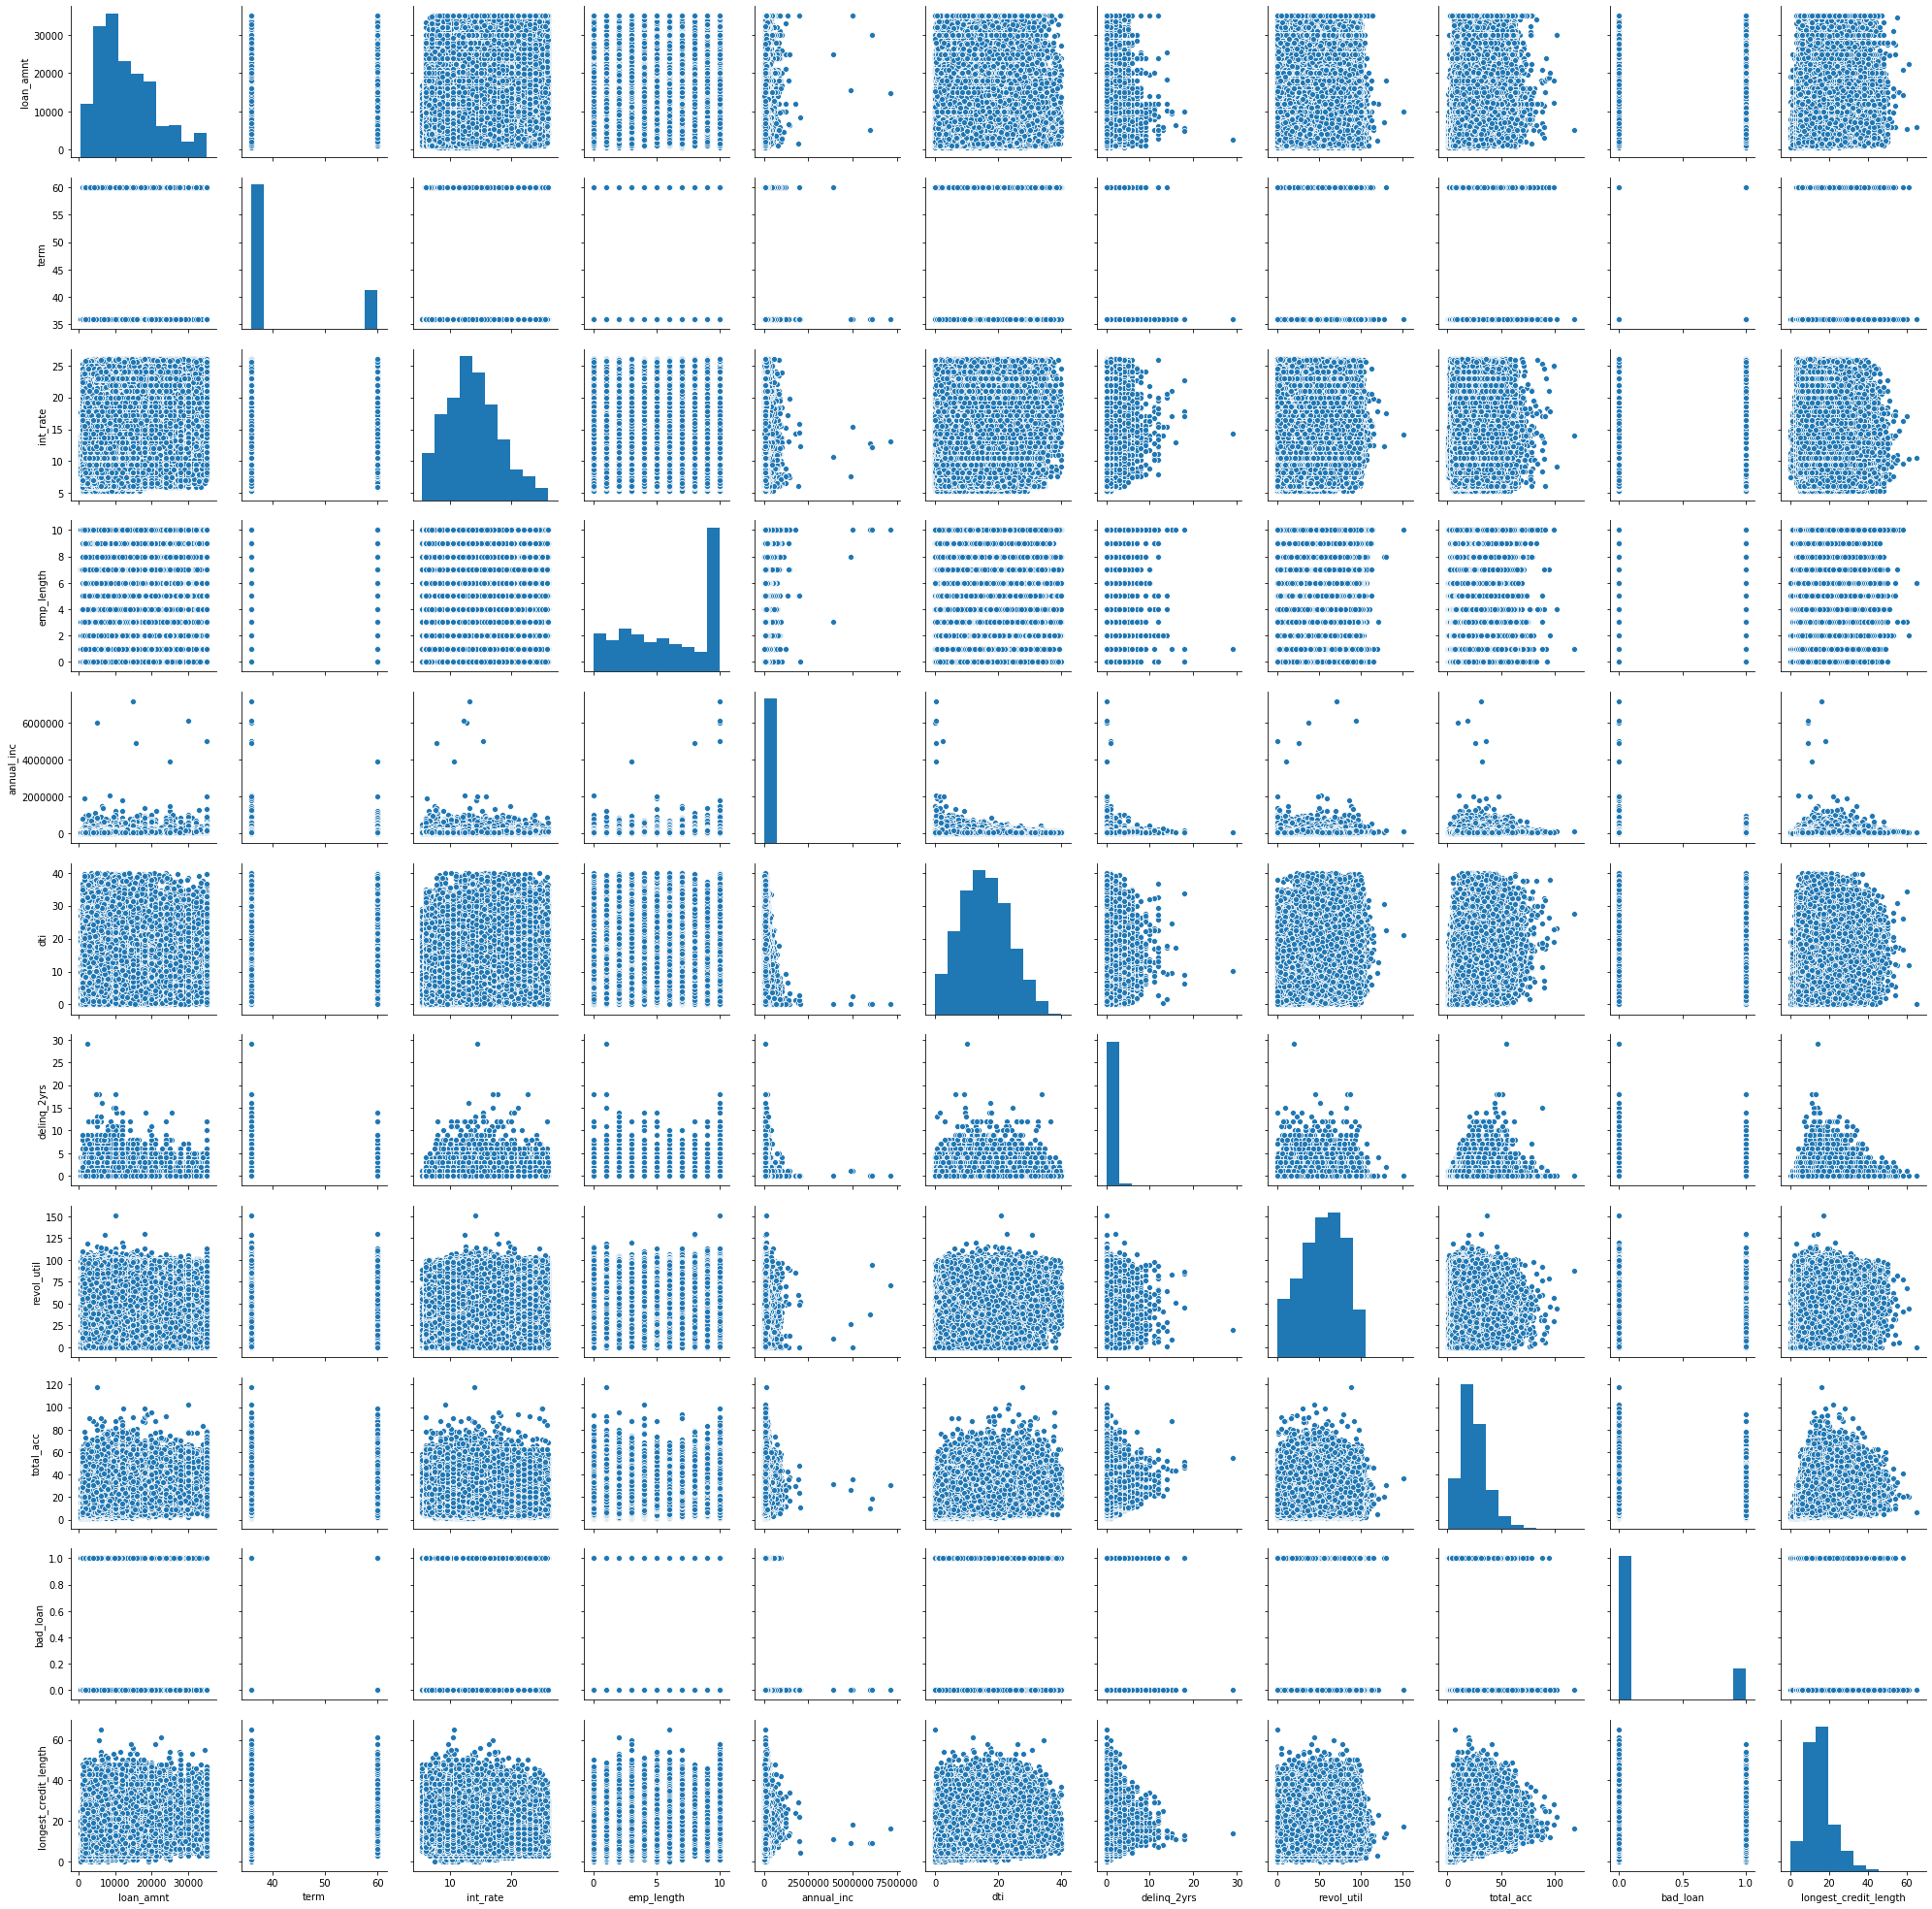

In [8]:
#Pair plot of each column
df_copy=df.copy()
df_copy.dropna(inplace=True)
sns.pairplot(df_copy)

0    133971
1     30016
Name: bad_loan, dtype: int64


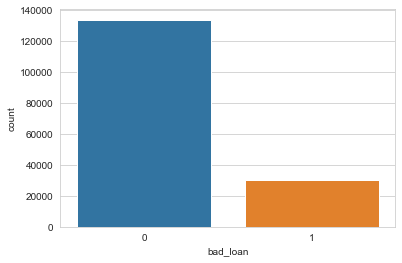

In [8]:
#Count of bad loan target feature
print(df['bad_loan'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='bad_loan',data=df)

MORTGAGE    79714
RENT        70526
OWN         13560
OTHER         156
NONE           30
ANY             1
Name: home_ownership, dtype: int64


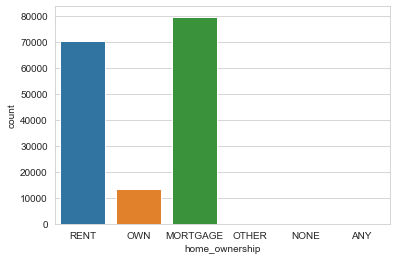

In [9]:
#count of 'home_ownership'
print(df['home_ownership'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='home_ownership',data=df)

In [10]:
df.groupby('bad_loan')['home_ownership'].value_counts()

bad_loan  home_ownership
0         MORTGAGE          66630
          RENT              56190
          OWN               11006
          OTHER               121
          NONE                 23
          ANY                   1
1         RENT              14336
          MORTGAGE          13084
          OWN                2554
          OTHER                35
          NONE                  7
Name: home_ownership, dtype: int64

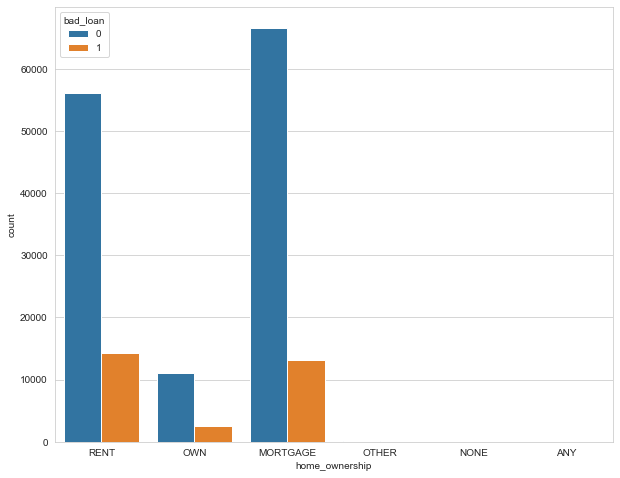

In [11]:
plt.figure(figsize=(10,8))

sns.countplot(df['home_ownership'], hue='bad_loan', data=df)

36    129950
60     34037
Name: term, dtype: int64


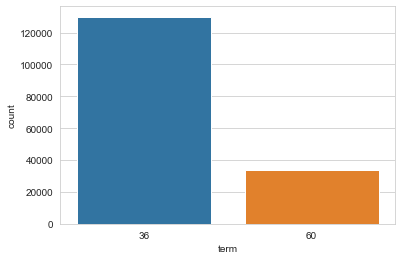

In [12]:
#count of 'term'
print(df['term'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='term',data=df)

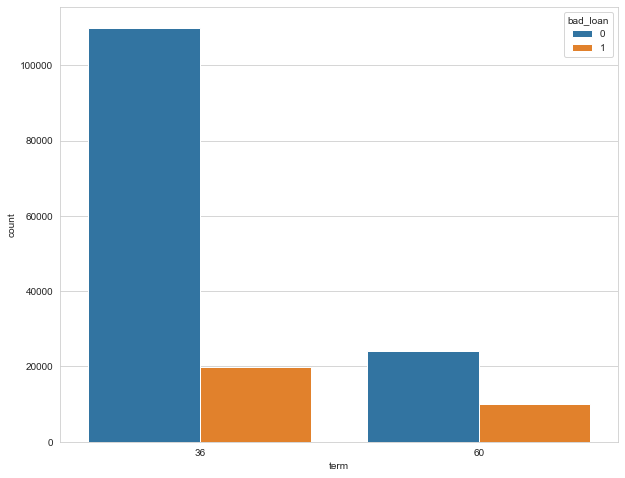

In [13]:
plt.figure(figsize=(10,8))

sns.countplot(df['term'], hue='bad_loan', data=df)

10.0    47183
2.0     15766
0.0     14248
3.0     13611
5.0     12347
1.0     11414
4.0     11024
6.0     10000
7.0      9079
8.0      7424
9.0      6087
Name: emp_length, dtype: int64


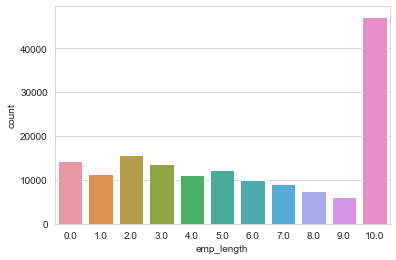

In [14]:
#count of 'emp_length'
print(df['emp_length'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='emp_length',data=df)

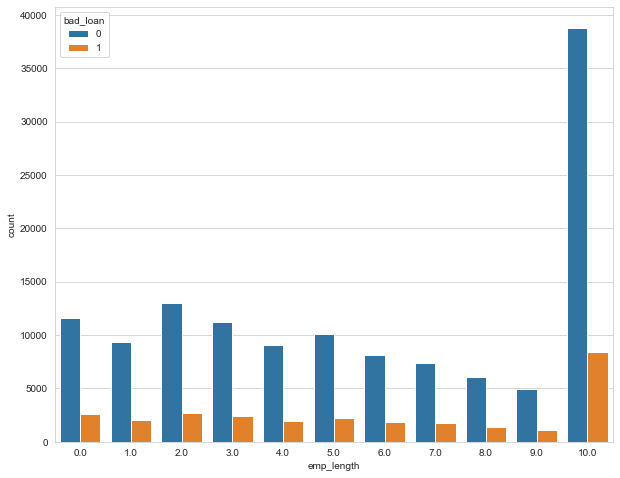

In [15]:
plt.figure(figsize=(10,8))

sns.countplot(df['emp_length'], hue='bad_loan', data=df)

Text(0, 0.5, 'count')

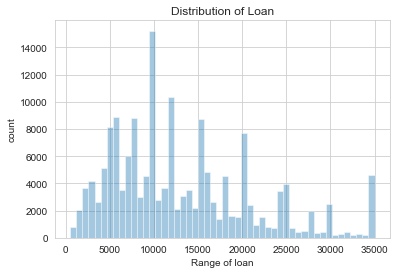

In [16]:
# print(df.groupby('bad_loan')['loan_amnt'].value_counts())
sns.distplot(df['loan_amnt'].dropna(),kde=False)
plt.title("Distribution of Loan")
plt.xlabel("Range of loan")
plt.ylabel("count")

12.12    5182
13.11    4627
7.90     4589
8.90     4516
15.31    3494
16.29    3458
10.99    3454
14.33    3321
6.03     3267
11.14    3252
12.99    3227
11.99    2624
6.62     2624
7.62     2601
17.27    2527
15.61    2525
14.09    2228
15.80    2193
10.16    2120
18.25    1814
17.77    1770
13.98    1746
17.57    1530
18.49    1476
12.49    1474
13.67    1468
19.05    1224
18.75    1202
13.99    1196
9.67     1176
         ... 
16.96       4
20.52       4
16.65       4
20.40       4
20.69       3
14.67       3
14.57       3
18.86       3
19.39       3
24.52       3
12.62       3
16.46       3
17.28       2
17.91       2
13.84       2
17.59       2
16.33       2
17.09       2
24.40       1
16.83       1
17.78       1
17.72       1
14.28       1
17.44       1
17.46       1
17.41       1
22.64       1
18.72       1
21.82       1
22.94       1
Name: int_rate, Length: 512, dtype: int64


Text(0, 0.5, 'count')

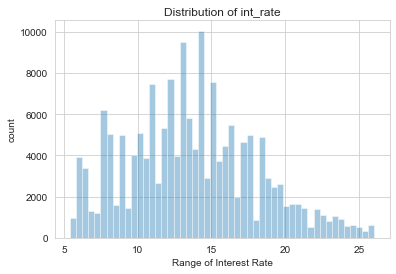

In [17]:
#count of 'int_rate'
print(df['int_rate'].value_counts())

sns.distplot(df['int_rate'].dropna(),kde=False)
plt.title("Distribution of int_rate")
plt.xlabel("Range of Interest Rate")
plt.ylabel("count")

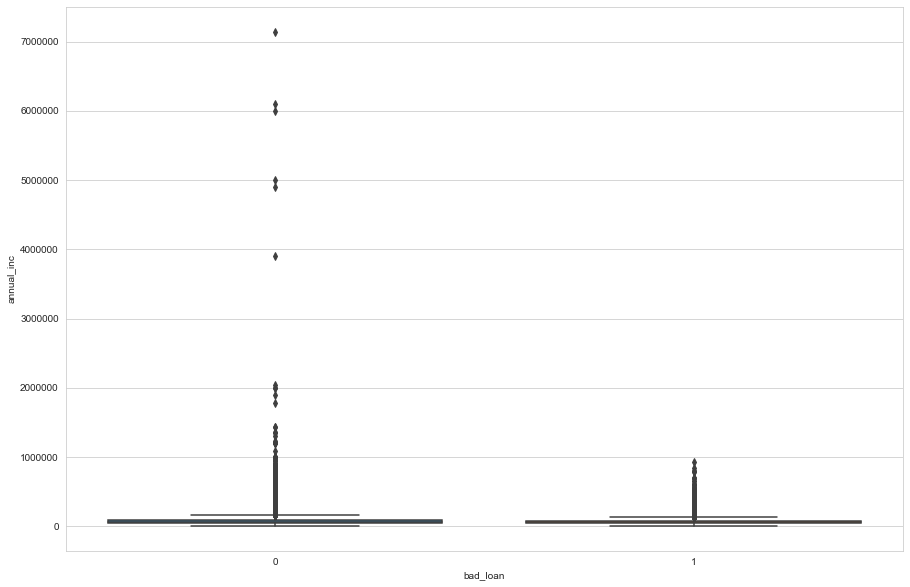

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x='bad_loan',y='annual_inc',data=df)

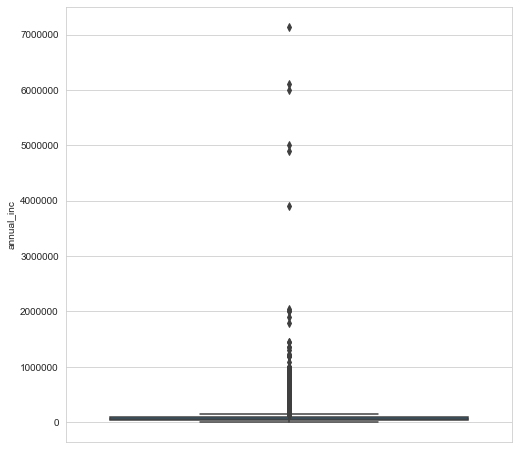

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(y='annual_inc',data=df)

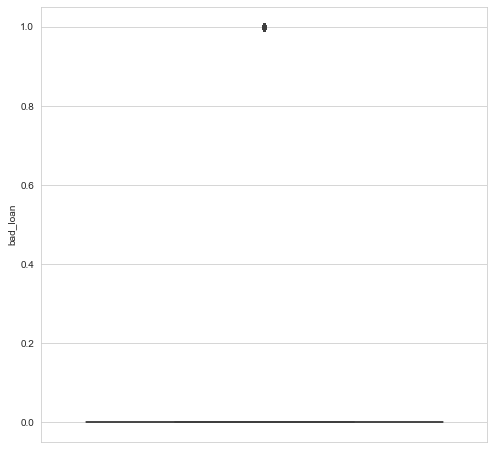

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(y='bad_loan',data=df)

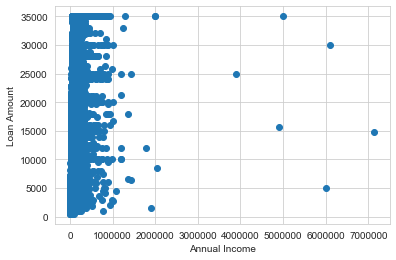

In [21]:
plt.scatter(df['annual_inc'],df['loan_amnt'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

(array([1.63897e+05, 7.30000e+01, 7.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00]), array([1.8960000e+03, 7.1588420e+05, 1.4298724e+06, 2.1438606e+06,
       2.8578488e+06, 3.5718370e+06, 4.2858252e+06, 4.9998134e+06,
       5.7138016e+06, 6.4277898e+06, 7.1417780e+06]), <a list of 10 Patch objects>)


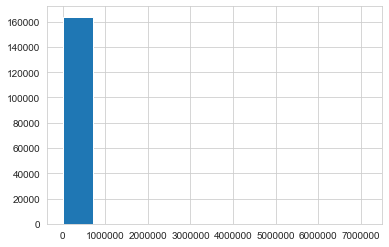

In [22]:
print(plt.hist(df['annual_inc']))

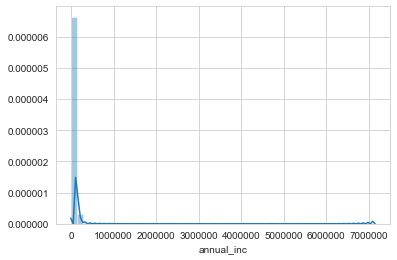

In [23]:
sns.distplot(df['annual_inc'].dropna())

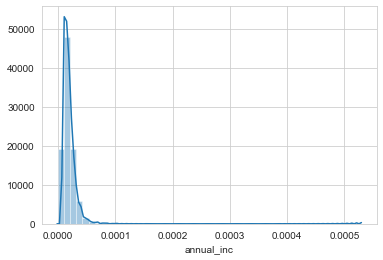

In [24]:
sns.distplot(np.reciprocal(df['annual_inc'].dropna()))

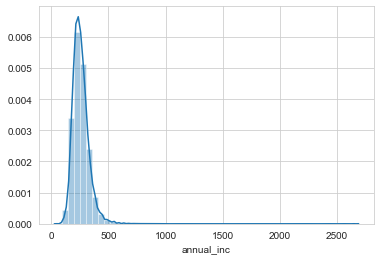

In [25]:
sns.distplot(np.sqrt(df['annual_inc'].dropna()))

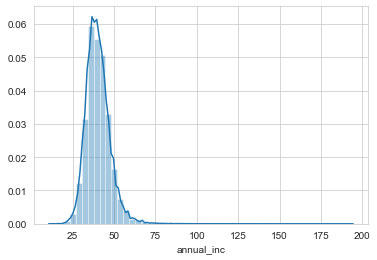

In [26]:
sns.distplot(np.cbrt(df['annual_inc'].dropna()))

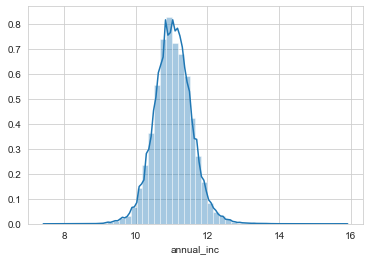

In [27]:
sns.distplot(np.log1p(df['annual_inc'].dropna()))

debt_consolidation    93261
credit_card           30792
other                 10492
home_improvement       9872
major_purchase         4686
small_business         3841
car                    2842
medical                2029
wedding                1751
moving                 1464
house                  1245
vacation               1096
educational             418
renewable_energy        198
Name: purpose, dtype: int64


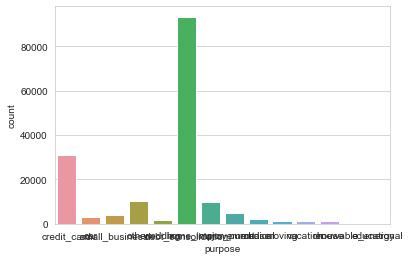

In [28]:
#count of 'purpose'
print(df['purpose'].value_counts())

sns.set_style('whitegrid')
sns.countplot(x='purpose',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

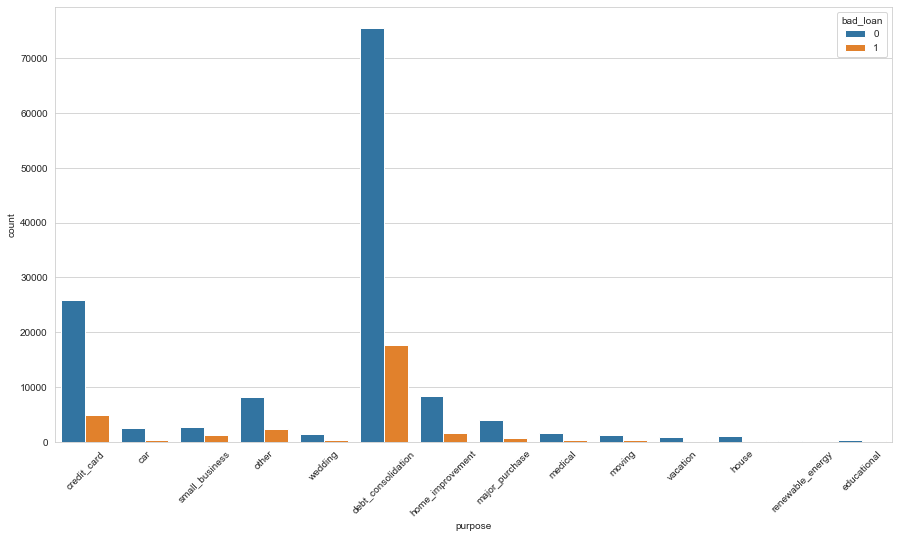

In [29]:
plt.figure(figsize=(15,8))

sns.countplot(df['purpose'], hue='bad_loan', data=df)
plt.xticks(rotation=45)

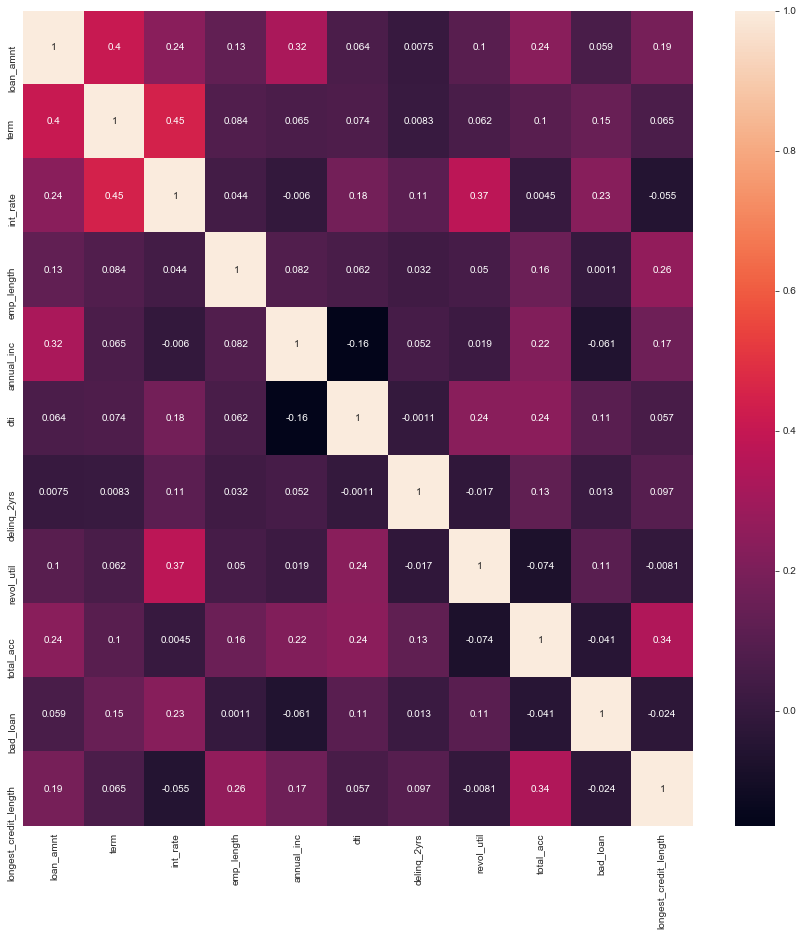

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

# Handling Missing Values

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [32]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mean())
df['emp_length'].isnull().sum()

0

In [33]:
df['annual_inc']=df['annual_inc'].fillna(df['annual_inc'].mean())
df['annual_inc'].isnull().sum()

0

In [34]:
df['delinq_2yrs']=df['delinq_2yrs'].fillna(df['delinq_2yrs'].mode()[0])
df['delinq_2yrs'].isnull().sum()

0

In [35]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())
df['revol_util'].isnull().sum()

0

In [36]:
df['total_acc']=df['total_acc'].fillna(df['total_acc'].median())
df['total_acc'].isnull().sum()

0

In [37]:
df['longest_credit_length']=df['longest_credit_length'].fillna(df['longest_credit_length'].mode()[0])
df['longest_credit_length'].isnull().sum()

0

In [38]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
emp_length               0
home_ownership           0
annual_inc               0
purpose                  0
addr_state               0
dti                      0
delinq_2yrs              0
revol_util               0
total_acc                0
bad_loan                 0
longest_credit_length    0
verification_status      0
dtype: int64

# Categorical Columns to Numeric :- Label Encoding

In [34]:
#'home_ownership', 'purpose', 'addr_state', 'verification_status'

In [39]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [40]:
# Encode labels in column 'home_ownership'. 
df['home_ownership']= label_encoder.fit_transform(df['home_ownership']) 
  
df['home_ownership'].unique()

array([5, 4, 1, 3, 2, 0], dtype=int64)

In [41]:
# Encode labels in column 'purpose'. 
df['purpose']= label_encoder.fit_transform(df['purpose']) 
  
df['purpose'].unique()

array([ 1,  0, 11,  9, 13,  2,  4,  6,  7,  8, 12,  5, 10,  3],
      dtype=int64)

In [42]:
# Encode labels in column 'addr_state'. 
df['addr_state']= label_encoder.fit_transform(df['addr_state']) 
  
df['addr_state'].unique()

array([ 3, 10, 14,  4, 42, 44, 24,  6, 43,  9, 33, 37, 23, 30, 36, 17, 34,
       39, 38, 18, 19, 46, 47,  1, 32,  5, 20, 48, 45, 22,  7, 40, 27,  2,
       16, 31, 11,  0, 35, 26, 49, 29,  8, 25, 41, 12, 28, 13, 15, 21],
      dtype=int64)

In [43]:
# Encode labels in column 'addr_state'. 
df['addr_state']= label_encoder.fit_transform(df['addr_state']) 
  
df['addr_state'].unique()

array([ 3, 10, 14,  4, 42, 44, 24,  6, 43,  9, 33, 37, 23, 30, 36, 17, 34,
       39, 38, 18, 19, 46, 47,  1, 32,  5, 20, 48, 45, 22,  7, 40, 27,  2,
       16, 31, 11,  0, 35, 26, 49, 29,  8, 25, 41, 12, 28, 13, 15, 21],
      dtype=int64)

In [44]:
# Encode labels in column 'verification_status'. 
df['verification_status']= label_encoder.fit_transform(df['verification_status']) 
  
df['verification_status'].unique()

array([1, 0], dtype=int64)

In [45]:
# #Converting Categorical-Numeric values
# from sklearn.preprocessing import LabelEncoder

# # process columns, apply LabelEncoder to categorical features
# for c in categorical_cols:
#     lbl = LabelEncoder() 
#     lbl.fit(list(df[c].values)) 
#     df[c] = lbl.transform(list(df[c].values))

In [46]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36,10.65,10.0,5,24000.0,1,3,27.65,0.0,83.7,9.0,0,26.0,1
1,2500,60,15.27,0.0,5,30000.0,0,10,1.00,0.0,9.4,4.0,1,12.0,1
2,2400,36,15.96,10.0,5,12252.0,11,14,8.72,0.0,98.5,10.0,0,10.0,0
3,10000,36,13.49,10.0,5,49200.0,9,4,20.00,0.0,21.0,37.0,0,15.0,1
4,5000,36,7.90,3.0,5,36000.0,13,3,11.20,0.0,28.3,12.0,0,7.0,1


# Converting acc_inc into log

In [47]:
df['annual_inc']=np.log1p(df['annual_inc'])

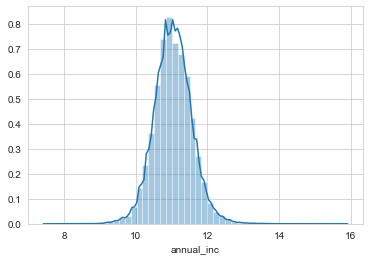

In [48]:
sns.distplot(df['annual_inc'])

In [49]:
df.describe()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
count,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000
mean,13074.169141,40.981419,13.715904,5.684353,2.970431,11.035689,3.005641,21.996140,15.881530,0.227317,54.081198,24.579454,0.183039,14.853769,0.639270
std,7993.556189,9.733453,4.391940,3.546192,1.935654,0.525164,2.777648,14.895238,7.587668,0.694113,25.270552,11.684176,0.386700,6.947222,0.480214
min,500.000000,36.000000,5.420000,0.000000,0.000000,7.548029,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7000.000000,36.000000,10.650000,2.000000,1.000000,10.714440,2.000000,6.000000,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000,0.000000
50%,11325.000000,36.000000,13.490000,5.684353,4.000000,11.018646,2.000000,22.000000,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000,1.000000
75%,18000.000000,36.000000,16.320000,10.000000,5.000000,11.350418,2.000000,34.000000,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000,1.000000
max,35000.000000,60.000000,26.060000,10.000000,5.000000,15.781472,13.000000,49.000000,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
loan_amnt                163987 non-null int64
term                     163987 non-null int64
int_rate                 163987 non-null float64
emp_length               163987 non-null float64
home_ownership           163987 non-null int32
annual_inc               163987 non-null float64
purpose                  163987 non-null int32
addr_state               163987 non-null int64
dti                      163987 non-null float64
delinq_2yrs              163987 non-null float64
revol_util               163987 non-null float64
total_acc                163987 non-null float64
bad_loan                 163987 non-null int64
longest_credit_length    163987 non-null float64
verification_status      163987 non-null int32
dtypes: float64(8), int32(3), int64(4)
memory usage: 16.9 MB


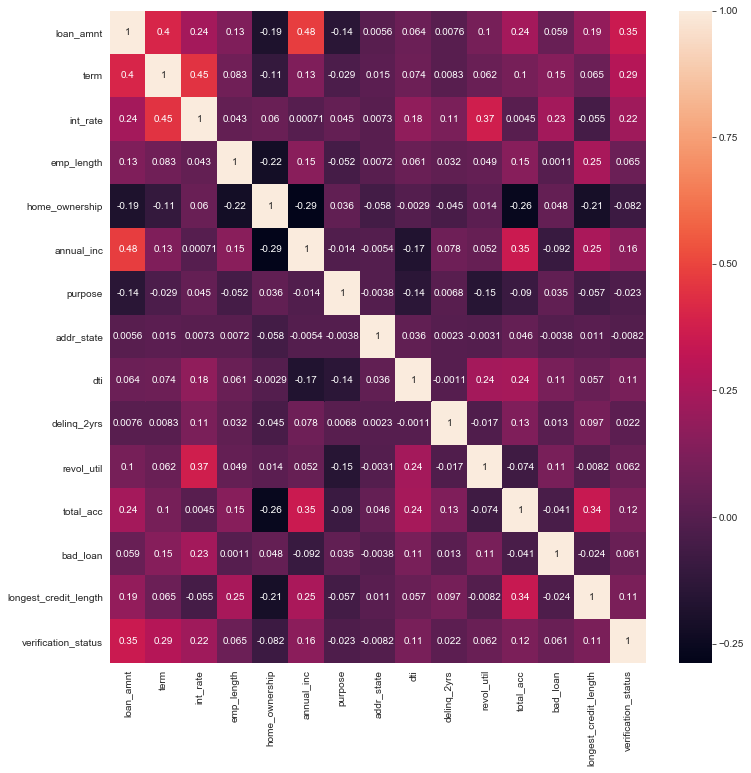

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [56]:
df=df.drop(['addr_state','dti','revol_util','total_acc'],axis=1)

# Train, Test Splitting of data

In [58]:
from sklearn.model_selection import train_test_split
x = df.drop('bad_loan', axis = 1)
y = df.bad_loan
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

# KNN classification

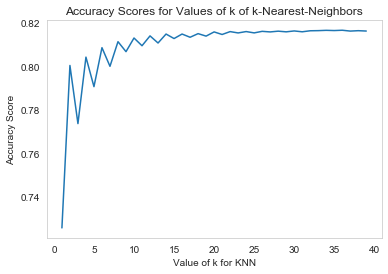

In [59]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,40))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.grid()
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

0.8165132020245137


# KNN with Cross validation

In [61]:
from sklearn.model_selection import GridSearchCV
import numpy as np
knn_grd=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(1,40)},cv=10)
knn_grd.fit(x,y)
knn_grd.best_params_

{'n_neighbors': 36}

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=35)
knn_cross_val = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
# print(knn_cross_val)
knn_cv_accuracy = knn_cross_val.mean()
print(knn_cv_accuracy)

0.8156378380189409


# Decision Tree

In [63]:
from sklearn import metrics
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state=17)
dtree = dtree.fit(x_train, y_train)

dtree_pred = dtree.predict(x_test)
# print (y_pred)

dtree_accuracy = metrics.accuracy_score(y_test, dtree_pred)
print(dtree_accuracy)

0.7108766794723256


# Decision Tree with Cross Validation

In [64]:
dtree_cross_val = cross_val_score(dtree, x, y, cv=10, scoring='accuracy')
# print(scores)
dtree_cv_accuracy = dtree_cross_val.mean()
print(dtree_cv_accuracy)

0.707318183696602


# SVM

In [65]:
# from sklearn.svm import SVC
# svm = SVC(gamma='auto',kernel='poly')
# svm.fit(x_train, y_train)
# svm_pred = svm.predict(x_test)
# svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
# print(svm_accuracy)

# SVM with Cross Validation

In [66]:
# svm_cross_val = cross_val_score(svm, x, y, cv=10, scoring='accuracy')
# svm_cv_accuracy = svm_cross_val.mean()
# print(svm_cv_accuracy)

# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Nb = GaussianNB()
Nb.fit(x_train,y_train)
Nb_pred= Nb.predict(x_test)
Nb_accuracy = metrics.accuracy_score(y_test, Nb_pred)
print(Nb_accuracy)

0.7851495009858325


# Naive Bayes with cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

Nb_cross_val = cross_val_score(Nb, x, y, cv=10, scoring='accuracy')
Nb_cv_accuracy = Nb_cross_val.mean()
print(Nb_cv_accuracy)

0.7814214025550249


# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rnd_for = RandomForestClassifier()
rnd_for.fit(x_train, y_train)
rnd_for_pred = rnd_for.predict(x_test)
rnd_for_accuracy = metrics.accuracy_score(y_test, rnd_for_pred)
print(rnd_for_accuracy)

0.8048458239323536


# Random Forest with Classification

In [70]:
rnd_for_cross_val = cross_val_score(rnd_for, x, y, cv=10, scoring='accuracy')
rnd_for_cv_accuracy = rnd_for_cross_val.mean()
print(rnd_for_cv_accuracy)

0.8034721824316684


# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = log.predict(x_test)
log_accuracy = metrics.accuracy_score(y_test, log_pred)
print(log_accuracy)

0.8155375327763889


# Logistic Regression with Cross validation

In [72]:
log_cross_val = cross_val_score(log, x, y, cv=10, scoring='accuracy')
# print(log_cross_val)
log_cv_accuracy = log_cross_val.mean()
print(log_cv_accuracy)

0.8151987158306502


# Adaboost

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


Ada_model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50)
Ada_model.fit(x_train,y_train)
ada_pred=Ada_model.predict(x_test)
ada_accuracy = metrics.accuracy_score(y_test, ada_pred)
print(ada_accuracy)

0.816919730877899


# Adaboost with cross Validation

In [74]:
ada_cross_val = cross_val_score(Ada_model, x, y, cv=10, scoring='accuracy')

ada_cv_accuracy = log_cross_val.mean()
print(ada_cv_accuracy)

0.8151987158306502


# Accuracy Comparison

In [76]:
no_cv = [knn_accuracy, dtree_accuracy,Nb_accuracy, rnd_for_accuracy, log_accuracy,ada_accuracy]
with_cv = [knn_cv_accuracy, dtree_cv_accuracy,Nb_cv_accuracy, rnd_for_cv_accuracy, log_cv_accuracy,ada_cv_accuracy]

In [77]:
accuracy = {'Without CV': no_cv,'With CV': with_cv}

In [80]:
accuracy_chart = pd.DataFrame(accuracy, index = ['KNN', 'DTREE','Naive Bayes','RND_FOR', 'LOG_REG','ADABOOST'])

In [81]:
print(accuracy_chart)

             Without CV   With CV
KNN            0.816513  0.815638
DTREE          0.710877  0.707318
Naive Bayes    0.785150  0.781421
RND_FOR        0.804846  0.803472
LOG_REG        0.815538  0.815199
ADABOOST       0.816920  0.815199


In [82]:
accuracy_chart.to_excel('Loan Prediction Accuracies without scaling.xlsx')